In [1]:
import darkflipper as dfp
from getdist import plots, MCSamples
import numpy as np

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Removed no burn in
Removed no burn in


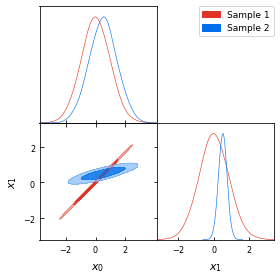

In [2]:
# Get some random samples for demonstration:
# make random covariance, then independent samples from Gaussian
ndim = 2
nsamp = 10000
random_state = np.random.default_rng(10)  # seed random generator
A = random_state.random((ndim, ndim))
cov = np.dot(A, A.T)
samps = random_state.multivariate_normal([0] * ndim, cov, size=nsamp)
A = random_state.random((ndim, ndim))
cov = np.dot(A, A.T)
samps2 = random_state.multivariate_normal([0.5] * ndim, cov, size=nsamp)

# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
names = ["x%s" % i for i in range(ndim)]
labels = ["x_%s" % i for i in range(ndim)]
samples = MCSamples(samples=samps, names=names, labels=labels, label="Sample 1")
samples2 = MCSamples(samples=samps2, names=names, labels=labels, label="Sample 2")
samples.loglikes = (samples["x1"] - 1) ** 2 / 1.2**2 / 2
samples2.loglikes = (samples2["x1"] - 1) ** 2 / 1.2**2 / 2
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples, samples2], filled=True)

In [3]:
foms = dfp.fom.covariance_matrix(
    [samples, samples2], param1="x0", param2="x1", verbose=True
)

FoM Sample 1: 33.735713509974076
FoM Sample 2: 7.193638099016324


FoM Sample 1: 23.478844259316443
FoM Sample 2: 7.202020439168445


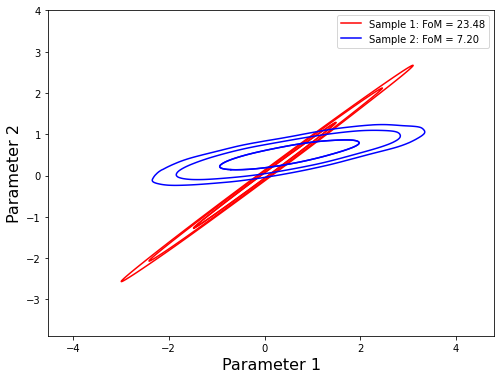

In [4]:
foms = dfp.fom.polygon([samples, samples2], param1="x0", param2="x1", verbose=True)

In [5]:
dfp.fob.parameter_bias(samples, samples2, [0, 1], ["x0", "x1"])

2.40323378431323